# **Import libaries**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# **Loading the dataset**

In [20]:
car_data = pd.read_csv("car_price.csv")
car_data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


# **Data Cleaning**

In [21]:
# Data Cleaning
car_data = car_data[car_data['Price'] != "Ask For Price"]  # Remove "Ask For Price"
car_data['Price'] = car_data['Price'].str.replace(',', '').astype(int)  # Clean Price
car_data['kms_driven'] = car_data['kms_driven'].str.replace(' kms', '').str.replace(',', '')  # Clean kms_driven
car_data = car_data[car_data['kms_driven'].notna()]  # Remove NaN in kms_driven
car_data = car_data[car_data['kms_driven'].str.isnumeric()]  # Keep only numeric kms_driven
car_data['kms_driven'] = car_data['kms_driven'].astype(float)  # Convert kms_driven to float
car_data['year'] = car_data['year'].astype(int)  # Convert year to integer
car_data.dropna(inplace=True)  # Drop remaining NaN values


<ipython-input-21-442deab6abe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['Price'] = car_data['Price'].str.replace(',', '').astype(int)  # Clean Price
<ipython-input-21-442deab6abe4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['kms_driven'] = car_data['kms_driven'].str.replace(' kms', '').str.replace(',', '')  # Clean kms_driven


# **Encode categorical variables (company, fuel_type)**

In [22]:
# Encode categorical variables (company, fuel_type)
car_data = pd.get_dummies(car_data, columns=['company', 'fuel_type'], drop_first=True)

# **Features and target variable**

In [23]:
# Features and target variable
X = car_data.drop(columns=['Price', 'name'])
y = car_data['Price']

# **Split the data into training and testing sets**

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train a Linear Regression model**

In [25]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Predict on test data**

In [26]:
# Predict on test data
y_pred = model.predict(X_test)

#**Evaluate the model**

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 673937.121153735


# **Show first few predictions**

In [28]:
# Show first few predictions
predicted_vs_actual = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(predicted_vs_actual.head())

     Actual Price  Predicted Price
204        135000     71738.062086
312        284999    271634.262610
791        189000    298243.163073
236        245000    232512.060087
570        215000    193343.132613


#**visualizations**

Distribution of Car Prices

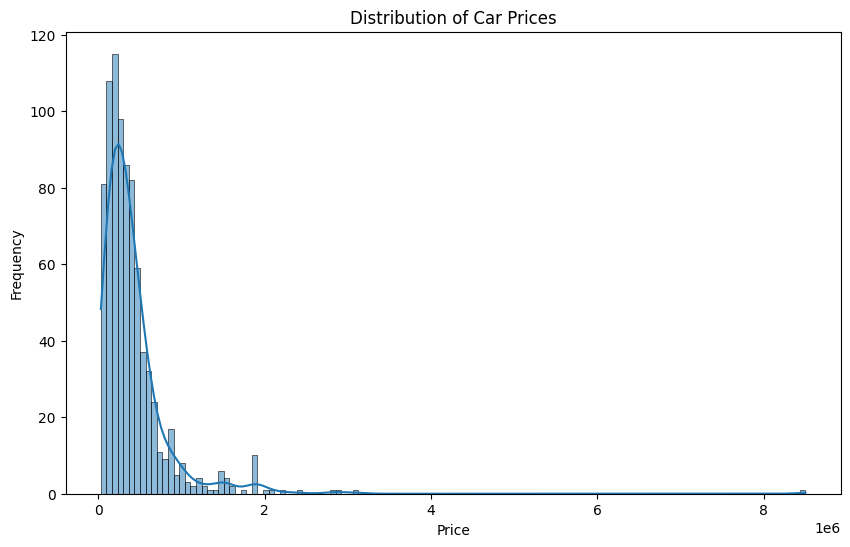

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



Scatter plot between Kms Driven and Price

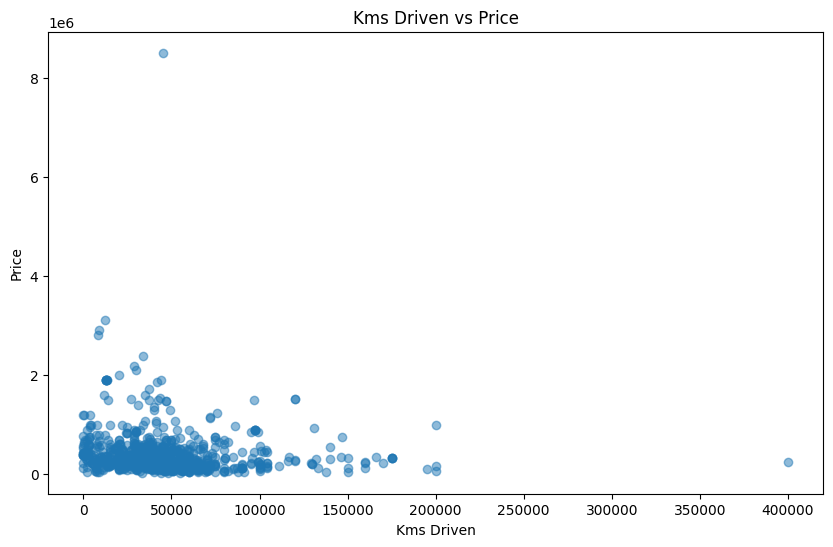

In [30]:
# 2. Scatter plot between Kms Driven and Price
plt.figure(figsize=(10, 6))
plt.scatter(car_data['kms_driven'], car_data['Price'], alpha=0.5)
plt.title('Kms Driven vs Price')
plt.xlabel('Kms Driven')
plt.ylabel('Price')
plt.show()



Regression Line (Actual vs Predicted Price)


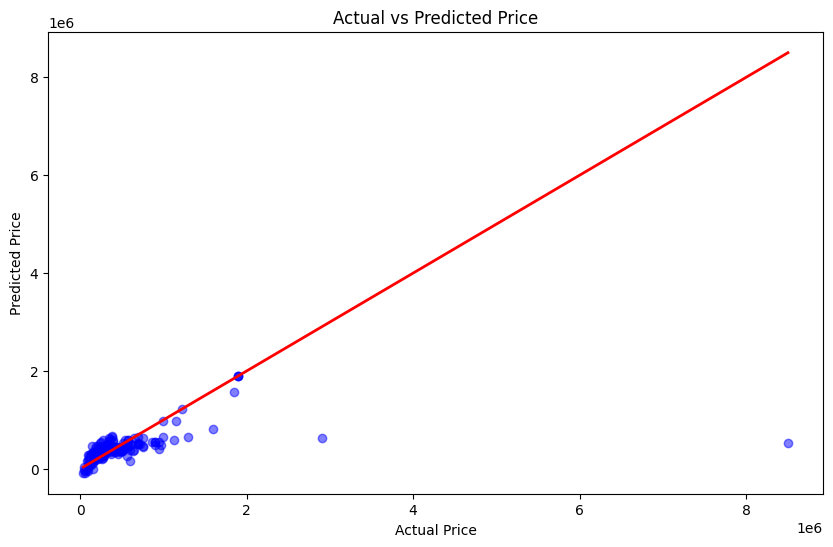

In [31]:

# 3. Regression Line (Actual vs Predicted Price)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()